# Jeg prøver en konkurrence på kaggle, hvor jeg skal bruge unsupervised k-means clustering.

https://www.kaggle.com/competitions/k-means-clustering-for-heart-disease-analysis/overview

In [1]:
import pandas as pd
import numpy as np
from numpy.random import uniform
import Utilities
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap
from time import sleep
from IPython import display

In [2]:
sns.set_style('white')

cmap = ListedColormap(sns.xkcd_palette(['denim blue', 
                                        'medium green', 
                                        'pale red',
                                        'yellow',
                                        'pale blue']))

# split data op i trænings og test data

In [3]:
data = pd.read_csv('data/heart_disease_filtered.csv')
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

print(X_train['age'].count())
print(X_test['age'].count())

X_train.head()

87
22


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
65,77,Male,Cleveland,asymptomatic,125.0,304.0,False,lv hypertrophy,162.0,True,0.0,upsloping,3.0,normal
26,59,Male,Cleveland,asymptomatic,170.0,326.0,False,lv hypertrophy,140.0,True,3.4,downsloping,0.0,reversable defect
22,54,Male,Cleveland,non-anginal,125.0,273.0,False,lv hypertrophy,152.0,False,0.5,downsloping,1.0,normal
31,48,Male,Cleveland,atypical angina,130.0,245.0,False,lv hypertrophy,180.0,False,0.2,flat,0.0,normal
47,65,Male,Cleveland,typical angina,138.0,282.0,True,lv hypertrophy,174.0,False,1.4,flat,1.0,normal


# Normaliser data.

Man skal normalisere træningsdata og testdata seperat. Hvis man skalere inden split, vil det lede til data lækage og data bias.

------------------------------------------------------------------------------------------------------------------------------------------------------------
Correct! When it comes to scaling data for machine learning, it’s generally recommended to avoid scaling the test data directly. Instead, follow these steps:

Split the Data: First, split your dataset into training and test subsets. The training set will be used for model training, while the test set remains untouched until evaluation.

Scale the Training Data: Apply the scaling transformation (such as standardization or normalization) only to the training data. This ensures that the model learns from standardized features during training.

Keep Test Data Untouched: The test data should remain in its original form (unscaled) throughout the process. This prevents any information leakage from the test set into the training process.

Evaluate Model Performance: After training your model using the scaled training data, evaluate its performance on the unscaled test data. This provides a realistic assessment of how well the model generalizes to new, unseen examples.

## label encoding for categorical variables:

metoden LabelEncode findes i Utilities.py filen

In [4]:
X_train = Utilities.LabelEncode(X_train)
X_test = Utilities.LabelEncode(X_test)

X_train.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
65,77,1,0,0,125.0,304.0,0,0,162.0,1,0.0,2,3.0,1
26,59,1,0,0,170.0,326.0,0,0,140.0,1,3.4,0,0.0,2
22,54,1,0,2,125.0,273.0,0,0,152.0,0,0.5,0,1.0,1
31,48,1,0,1,130.0,245.0,0,0,180.0,0,0.2,1,0.0,1
47,65,1,0,3,138.0,282.0,1,0,174.0,0,1.4,1,1.0,1


## Numerisk skalering med standardscaler

In [5]:
scaler = StandardScaler()

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_train.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
65,2.458593,1,0,0,-0.349258,1.028100,0,0,0.486098,1,-0.877114,2,3.0,1
26,0.546896,1,0,0,1.895973,1.422129,0,0,-0.453691,1,1.868392,0,0.0,2
22,0.015870,1,0,2,-0.349258,0.472877,0,0,0.058921,0,-0.473363,0,1.0,1
31,-0.621362,1,0,1,-0.099788,-0.028616,0,0,1.255016,0,-0.715614,1,0.0,1
47,1.184128,1,0,3,0.299364,0.634070,1,0,0.998710,0,0.253389,1,1.0,1


In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

## Træn modellen

n_init: hvor mange gange modellen kører.
n_clusters: hvor mange clusters jeg vil have bliver lavet.

In [7]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

model.fit(X_pca)

c:\Users\Christian\anaconda3\envs\ml-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=42)

## Se cluster labels

In [8]:
cluster_labels = model.labels_

print(cluster_labels)

[1 1 3 0 3 3 0 2 3 2 0 0 2 0 2 0 2 0 1 1 1 3 3 0 0 3 2 2 0 3 0 0 0 3 0 2 1
 2 3 1 0 3 0 0 2 2 2 2 3 0 2 1 2 3 1 2 0 1 0 1 0 3 0 2 0 3 2 0 1 3 1 0 0 3
 0 2 0 3 2 0 2 3 1 1 0 0 1]


## Simpelt cluster plot

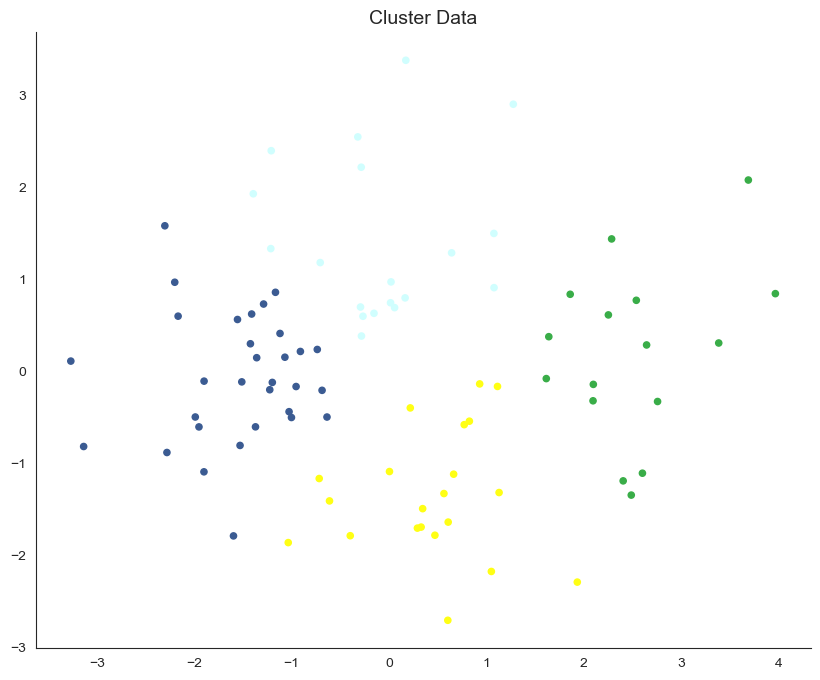

In [9]:

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20, cmap=cmap)
plt.title('Cluster Data', fontsize=14)
sns.despine();

# Voronoi Plot

definer metoden:

In [10]:
def plot_voronoi(x, y, labels, centroids, assignments,
                 distance, iteration, step, ax, delay=1):
    ax.clear()
    ax.scatter(x, y, c=labels, s=20, cmap=cmap)

    # plot cluster centers
    ax.scatter(*centroids.T,
               marker='o',
               c='w',
               s=200,
               edgecolor='k',
               zorder=9)

    for i, c in enumerate(centroids):
        ax.scatter(c[0], c[1],
                   marker=f'${i}$',
                   s=50,
                   edgecolor='k',
                   zorder=10)

    # plot links to centroid
    cx, cy = centroids.T
    for i, label in enumerate(assignments):
        ax.plot([x[i], cx[label]], 
                [y[i], cy[label]], 
                ls='--',
                color='k', 
                lw=0.5)

    # plot voronoi
    xx, yy = np.meshgrid(np.arange(x.min() - 1, x.max() + 1, .01),
                         np.arange(y.min() - 1, y.max() + 1, .01))
    Z = Utilities.assign_points(centroids, 
                      np.c_[xx.ravel(),  
                            yy.ravel()],
                            cdist).reshape(xx.shape)
    
    plt.imshow(Z, interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=cmap, 
               aspect='auto', 
               origin='lower', 
               alpha=.2)
    title = f'Iteration: {iteration} | {step} | Distance: {distance:,.1f}'
    ax.set_title(title)
    sns.despine()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(delay)

Plot det

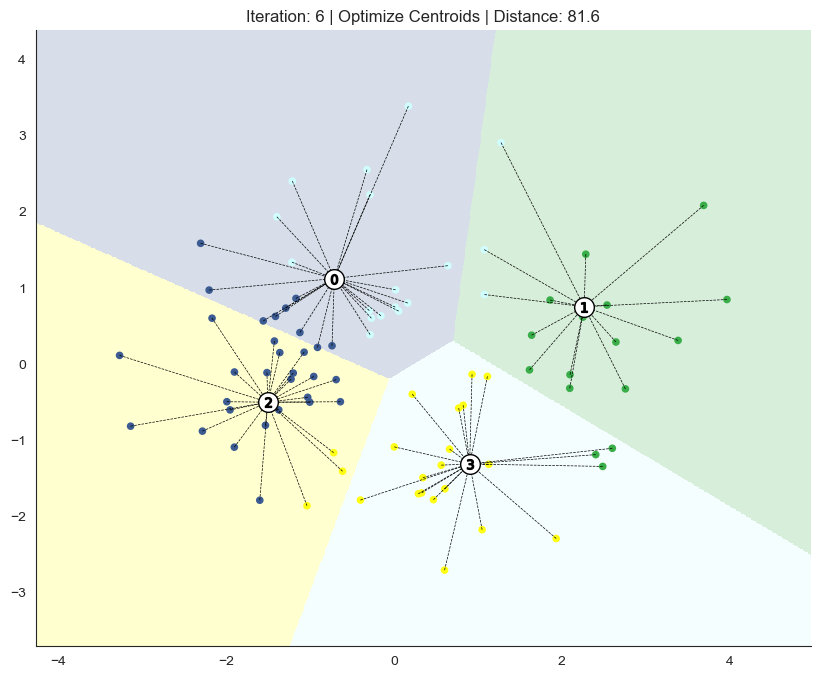

In [11]:
x_init = uniform(X_pca[:, 0].min(), X_pca[:, 0].max(),
                 size=n_clusters)
y_init = uniform(X_pca[:, 1].min(), X_pca[:, 1].max(),
                 size=n_clusters)
centroids = np.column_stack((x_init, y_init))

distance = np.sum(np.min(cdist(X_pca,
                               centroids),
                         axis=1))

fig, ax = plt.subplots(figsize=(10, 8))

iteration, tolerance, delta = 0, 1e-4, np.inf

while delta > tolerance:
    assignments = Utilities.assign_points(centroids, X_pca, cdist)
    plot_voronoi(X_pca[:, 0], X_pca[:, 1], cluster_labels,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Assign Data',
                 ax=ax)

    centroids = Utilities.optimize_centroids(X_pca, assignments)
    delta = distance - Utilities.distance_to_center(centroids,
                                          X_pca,
                                          assignments,
                                          cdist)
    distance -= delta

    plot_voronoi(X_pca[:, 0], X_pca[:, 1], cluster_labels,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Optimize Centroids',
                 ax=ax)
    iteration += 1

# Brug modellen på test data

In [12]:
X_pca_test = pca.fit_transform(X_test)
# Predict clusters for the test dataset
cluster_labels = model.predict(X_pca_test)

plot det

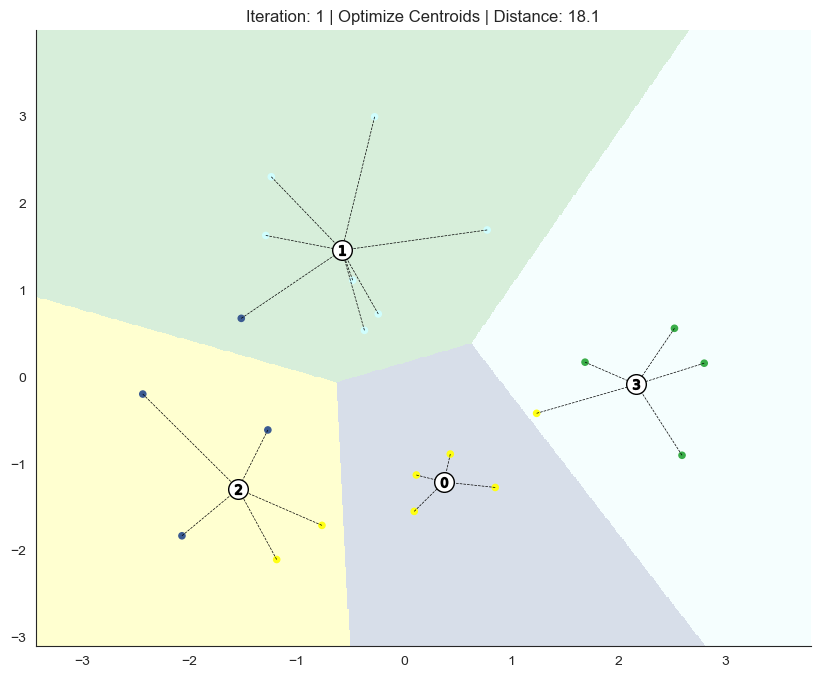

In [13]:
x_init = uniform(X_pca_test[:, 0].min(), X_pca_test[:, 0].max(),
                 size=n_clusters)
y_init = uniform(X_pca_test[:, 1].min(), X_pca_test[:, 1].max(),
                 size=n_clusters)
centroids = np.column_stack((x_init, y_init))

distance = np.sum(np.min(cdist(X_pca_test,
                               centroids),
                         axis=1))

fig, ax = plt.subplots(figsize=(10, 8))

iteration, tolerance, delta = 0, 1e-4, np.inf

while delta > tolerance:
    assignments = Utilities.assign_points(centroids, X_pca_test, cdist)
    plot_voronoi(X_pca_test[:, 0], X_pca_test[:, 1], cluster_labels,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Assign Data',
                 ax=ax)

    centroids = Utilities.optimize_centroids(X_pca_test, assignments)
    delta = distance - Utilities.distance_to_center(centroids,
                                          X_pca_test,
                                          assignments,
                                          cdist)
    distance -= delta

    plot_voronoi(X_pca_test[:, 0], X_pca_test[:, 1], cluster_labels,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Optimize Centroids',
                 ax=ax)
    iteration += 1